In [68]:
import pandas as pd
from matplotlib import pyplot as plt


In [69]:
csv_file_path='correct_PeterMac_HRD_clinical_data.csv'

In [70]:
df = pd.read_csv(csv_file_path)
df.head()

,Run,SampleID,Source,MonthsOld,Purity,SeqRunID,DDMSampleID,MIDS,TotalReads(M),lpWGSReads(M),...,SignalNoiseRatio,QAStatus,Gene,Variant,%VariantFraction,MyriadGIScore,MyriadGIStatus,SOPHiAGIIndex,Predictions,SophiaGIStatus
0,Run1,1410-1517,TAS,8,90,Run1,200085906-407-S10,S10,22.1,14.2,...,4.08,Medium,NaN,NaN,NaN,NaN,NaN,8.8,0.561508,Positive
1,Run1,1413-3340,QLD,243,25,Run1,200085907-387-S11,S11,21.8,18.7,...,1.34,Medium,NaN,NaN,NaN,NaN,NaN,9.2,0.485424,Positive
2,Run1,1410-3300,TAS,-129,90,Run1,200085909-404-S13,S13,22.5,16.5,...,4.64,High,NaN,NaN,NaN,NaN,NaN,0.8,0.586519,Positive
3,Run1,1413-4688,VIC,-16,70,Run1,200085910-394-S14,S14,21.0,16.9,...,4.67,High,NaN,NaN,NaN,NaN,NaN,10.2,0.566744,Positive
4,Run1,1407-7410,VIC,0,80,Run1,200085911-388-S15,S15,17.0,13.1,...,3.64,High,NaN,NaN,NaN,NaN,NaN,4.7,0.599290,Positive


In [71]:
df_PlotData= df[['SOPHiAGIIndex','Predictions']]
df_PlotData

,SOPHiAGIIndex,Predictions
0,8.8,0.561508
1,9.2,0.485424
2,0.8,0.586519
3,10.2,0.566744
4,4.7,0.599290
...,...,...
89,-4.3,0.557053
90,9.9,0.554550
91,-0.9,0.567048
92,-17.3,0.562775


In [72]:
df_PlotData['Predicted'] = df['Predictions'].apply(lambda x: 'Agree' if x > 0.5 else 'Disagree')
df_PlotData

C:\Users\Roberto\AppData\Local\Temp\ipykernel_23824\144725989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PlotData['Predicted'] = df['Predictions'].apply(lambda x: 'Agree' if x > 0.5 else 'Disagree')


,SOPHiAGIIndex,Predictions,Predicted
0,8.8,0.561508,Agree
1,9.2,0.485424,Disagree
2,0.8,0.586519,Agree
3,10.2,0.566744,Agree
4,4.7,0.599290,Agree
...,...,...,...
89,-4.3,0.557053,Agree
90,9.9,0.554550,Agree
91,-0.9,0.567048,Agree
92,-17.3,0.562775,Agree


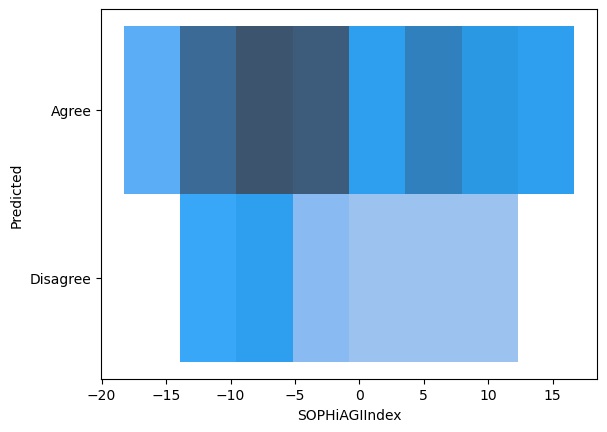

In [73]:
import seaborn as sns
sns.histplot(data = df_PlotData, x= 'SOPHiAGIIndex', y= 'Predicted', multiple= 'stack' )

plt.savefig('Prediction_SeaBorn.png')

# import matplotlib.pyplot as plt
# cat = df_PlotData['Higher or Lower than 0.5'].unique()
# len_c = len(cat)

# for i, category in enumerate(cat):
#     plt.hist(df_PlotData[df_PlotData['Higher or Lower than 0.5']==category]['SOPHiAGIIndex'], bins = 10, label= category)

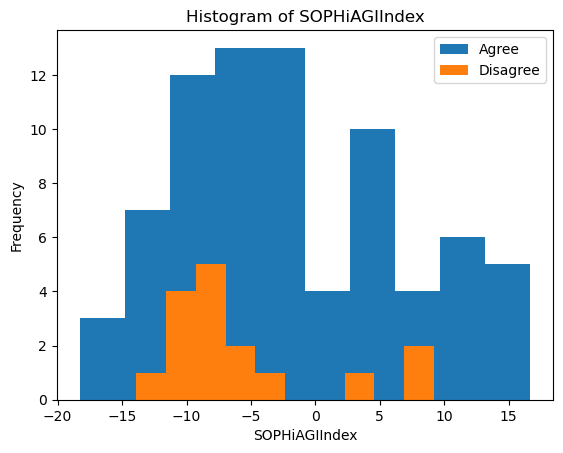

In [74]:
import matplotlib.pyplot as plt
cat = df_PlotData['Predicted'].unique()
len_c = len(cat)

for i, category in enumerate(cat):
    plt.hist(df_PlotData[df_PlotData['Predicted']==category]['SOPHiAGIIndex'], bins = 10, label= category)

# Add labels, title, legend, etc.
plt.xlabel('SOPHiAGIIndex')
plt.ylabel('Frequency')
plt.title('Histogram of SOPHiAGIIndex')
plt.legend()

plt.savefig('Predicted_Histogram.png')

plt.show()





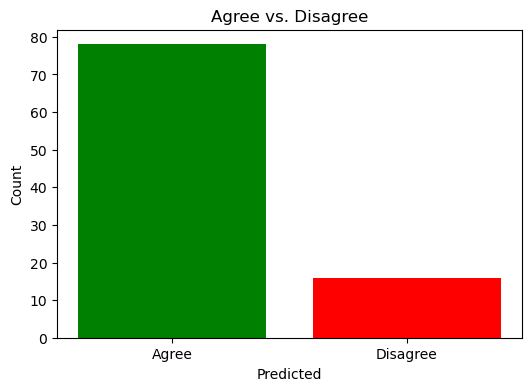

In [75]:
# Count the occurrences of 'Positive' and 'Negative'


positive_count = (df_PlotData['Predicted'] == 'Agree').sum()
negative_count = (df_PlotData['Predicted'] == 'Disagree').sum()

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Agree', 'Disagree'], [positive_count, negative_count], color=['green', 'red'])
plt.title('Agree vs. Disagree')
plt.xlabel('Predicted')
plt.ylabel('Count')

plt.savefig('Predicted_BarGraph.png')

plt.show()